In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(verbose=False, 
           classifier='kunetplus2d',
           discriminator='cnn',
           filter_num= [16, 32, 64, 128, 256, 512],
           stack_num_down=3, 
           stack_num_up=3, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=True, 
           unpool=False, 
           deep_supervision=False,
           weights=None, 
           freeze_backbone=True, 
           freeze_batch_norm=True,
           optimizer=None, 
           loss=None, 
           metric=None           
          )

*** GP2  KUNetPlus2D ***
Working directory: /tmp/tmpkqfcqg6oGP2


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [5]:
images.shape

(10000, 512, 512, 1)

In [6]:
masks.shape

(10000, 512, 512, 1)

In [7]:
R.run(images=images, masks=masks, runs=8, use_multi_gpu=True)

Number of devices: 3
Weights OK!
******
Loop 1
Epoch 1/100
8/8 [==============================] - 29s 2s/step - loss: 0.8263 - dice_coeff: 0.1965 - val_loss: 0.6892 - val_dice_coeff: 0.1628
Epoch 2/100
8/8 [==============================] - 12s 2s/step - loss: 0.6595 - dice_coeff: 0.2029 - val_loss: 0.6858 - val_dice_coeff: 0.1627
Epoch 3/100
8/8 [==============================] - 11s 2s/step - loss: 0.6158 - dice_coeff: 0.2166 - val_loss: 0.6810 - val_dice_coeff: 0.1625
Epoch 4/100
8/8 [==============================] - 12s 2s/step - loss: 0.5821 - dice_coeff: 0.2379 - val_loss: 0.6741 - val_dice_coeff: 0.1623
Epoch 5/100
8/8 [==============================] - 12s 2s/step - loss: 0.5502 - dice_coeff: 0.2636 - val_loss: 0.6644 - val_dice_coeff: 0.1619
Epoch 6/100
8/8 [==============================] - 12s 2s/step - loss: 0.5221 - dice_coeff: 0.2833 - val_loss: 0.6528 - val_dice_coeff: 0.1615
Epoch 7/100
8/8 [==============================] - 12s 2s/step - loss: 0.5025 - dice_coeff: 0.2

9/9 [==============================] - 12s 1s/step - loss: 0.1725 - dice_coeff: 0.5489 - val_loss: 0.1921 - val_dice_coeff: 0.5214
Epoch 51/100
9/9 [==============================] - 12s 1s/step - loss: 0.1722 - dice_coeff: 0.5464 - val_loss: 0.1944 - val_dice_coeff: 0.5117
Epoch 52/100
9/9 [==============================] - 12s 1s/step - loss: 0.1723 - dice_coeff: 0.5480 - val_loss: 0.1917 - val_dice_coeff: 0.5152
Epoch 53/100
9/9 [==============================] - 12s 1s/step - loss: 0.1712 - dice_coeff: 0.5488 - val_loss: 0.1903 - val_dice_coeff: 0.5118
Epoch 54/100
9/9 [==============================] - 12s 1s/step - loss: 0.1693 - dice_coeff: 0.5533 - val_loss: 0.1881 - val_dice_coeff: 0.5193
Epoch 55/100
9/9 [==============================] - 12s 1s/step - loss: 0.1686 - dice_coeff: 0.5547 - val_loss: 0.1873 - val_dice_coeff: 0.5203
Epoch 56/100
9/9 [==============================] - 13s 1s/step - loss: 0.1673 - dice_coeff: 0.5584 - val_loss: 0.1868 - val_dice_coeff: 0.5285
Epoch

9/9 [==============================] - 13s 2s/step - loss: 0.1044 - dice_coeff: 0.6614 - val_loss: 0.1265 - val_dice_coeff: 0.6180
Epoch 15/100
9/9 [==============================] - 13s 2s/step - loss: 0.1043 - dice_coeff: 0.6616 - val_loss: 0.1251 - val_dice_coeff: 0.6212
Epoch 16/100
9/9 [==============================] - 13s 1s/step - loss: 0.1039 - dice_coeff: 0.6625 - val_loss: 0.1228 - val_dice_coeff: 0.6281
Epoch 17/100
9/9 [==============================] - 13s 2s/step - loss: 0.1037 - dice_coeff: 0.6632 - val_loss: 0.1223 - val_dice_coeff: 0.6323
Epoch 18/100
9/9 [==============================] - 14s 2s/step - loss: 0.1022 - dice_coeff: 0.6664 - val_loss: 0.1224 - val_dice_coeff: 0.6285
Epoch 19/100
9/9 [==============================] - 13s 1s/step - loss: 0.1017 - dice_coeff: 0.6672 - val_loss: 0.1219 - val_dice_coeff: 0.6312
Epoch 20/100
9/9 [==============================] - 13s 2s/step - loss: 0.1008 - dice_coeff: 0.6693 - val_loss: 0.1216 - val_dice_coeff: 0.6325
Epoch

In [8]:
R.classifier_scores

[[0.2452220618724823, 0.4245315194129944],
 [0.17513538897037506, 0.5285868644714355],
 [0.15414933860301971, 0.5753246545791626],
 [0.13023480772972107, 0.6093093156814575],
 [0.11374145746231079, 0.6583123803138733],
 [0.11214786022901535, 0.6495315432548523],
 [0.10503754019737244, 0.670362651348114],
 [0.09934132546186447, 0.709187924861908]]

In [9]:
R.discriminator_scores

[[20.38648796081543, 0.5400000214576721],
 [22.721464157104492, 0.5016666650772095],
 [19.421255111694336, 0.5383333563804626],
 [21.160127639770508, 0.5199999809265137],
 [20.490982055664062, 0.5099999904632568],
 [20.0717716217041, 0.5433333516120911],
 [23.238977432250977, 0.4833333194255829],
 [21.937623977661133, 0.5099999904632568]]

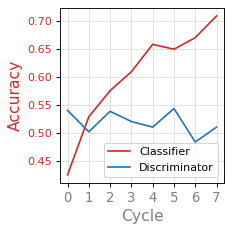

In [10]:
R.plot()